In [156]:
import numpy
import collections
import json
import random
import math

In [157]:
# copied over from predictions.ipynb
class Metadata:
    def __init__(self, ids, cels, metadata):
        self.IDs = ids
        self.CELs = cels
        self.modal_allele = [int(metadata[i]["modal_allele"]) for i in ids]
        self.progenitor_allele = [int(metadata[i]["progenitor_allele"]) for i in ids]
        self.MIRS = [int(metadata[i]["MIRS"]) for i in ids]
    def __str__(self):
        return "Metadata={{IDs: {}...,\n CELs: {}...,\n modal_allele: {}...,\n progenitor_allele: {}...,\n MIRS: {}...}}".format(self.IDs[:5], self.CELs[:5], self.modal_allele[:5], self.progenitor_allele[:5], self.MIRS[:5])
    def __repr__(self):
        return self.__str__()

def load_metadata():
    metadata = {}
    metadata_order = []
    with open("metadata.txt") as f:
        for i, line in enumerate(f):
            line = line.strip().split()
            if i == 0:
                names = line[1:]
            else:
                values = line[1:]
                patient_id = line[0]
                metadata_order.append(patient_id)
                metadata[patient_id] = {k: v for k, v in zip(names, values)}
    blood_IDs = [i for i in metadata_order]
    muscle_IDs = [i for i in metadata_order if metadata[i]["muscle_cel"] != "refused_biopsy"]
    blood_CELs = [metadata[i]["blood_cel"] for i in blood_IDs]
    muscle_CELs = [metadata[i]["muscle_cel"] for i in muscle_IDs]
        
    blood_record = Metadata(blood_IDs, blood_CELs, metadata)
    muscle_record = Metadata(muscle_IDs, muscle_CELs, metadata)
    return blood_record, muscle_record

In [158]:
_, muscle = load_metadata()

In [159]:
# pick up participants with unique MAL

In [160]:
def MAL_to_ID_ifunique(blood):
    reverse_blood = {j: i for i, j in zip(blood.IDs, blood.modal_allele)}
    counter_blood = collections.defaultdict(int)
    for ma, ids in zip(blood.modal_allele, blood.IDs):
        counter_blood[ma] += 1
    good_mal = [i for i, j in counter_blood.items() if j == 1]
    good_IDs = {i: reverse_blood[i] for i in good_mal}
    return good_IDs

In [161]:
pick_up_unique_MAL(muscle)

{11: '360448352',
 77: '830225708',
 83: '575039926',
 186: '420299717',
 240: '873750289',
 261: '377666471',
 290: '321962190',
 297: '117440822',
 345: '473208969',
 408: '129523253',
 561: '819054051',
 593: '124563003',
 604: '549452228',
 654: '328687703',
 697: '896445336',
 740: '270148799',
 866: '881676366',
 872: '111747589',
 993: '230974357',
 999: '661252781',
 1000: '449599671',
 1035: '159834720',
 1111: '315805040',
 1261: '427374914'}

In [162]:
with open("simulation_results/nakamori_muscle_10000_500_2") as f:
    simulation_result = json.load(f)

In [163]:
[key for key in simulation_result]

['real_alleles', 'predicted_alleles']

In [164]:
average_mal = sum(muscle.modal_allele)/len(muscle.modal_allele)

In [178]:
prediction_difference = [predicted - real for predicted, real in zip(simulation_result["predicted_alleles"], simulation_result["real_alleles"])]

In [179]:
prediction_difference_small_effect = [predicted - real - 0.1 * real for predicted, real in zip(simulation_result["predicted_alleles"], simulation_result["real_alleles"])]

In [180]:
prediction_difference_medium_effect = [predicted - real - 0.2 * real for predicted, real in zip(simulation_result["predicted_alleles"], simulation_result["real_alleles"])]

In [181]:
prediction_difference_large_effect = [predicted - real - 0.5 * real for predicted, real in zip(simulation_result["predicted_alleles"], simulation_result["real_alleles"])]

In [183]:
import matplotlib.pyplot as plt

(array([2.0000e+01, 1.3290e+03, 2.6300e+02, 1.3280e+03, 1.4380e+03,
        2.4170e+03, 3.4560e+03, 4.2450e+03, 4.8410e+03, 5.3360e+03,
        4.8350e+03, 4.8880e+03, 6.6320e+03, 9.3290e+03, 1.3118e+04,
        1.4668e+04, 1.3031e+04, 1.0925e+04, 1.0395e+04, 8.1590e+03,
        6.0110e+03, 4.1340e+03, 3.4610e+03, 2.7920e+03, 1.8140e+03,
        8.6900e+02, 2.1500e+02, 3.8000e+01, 1.1000e+01, 2.0000e+00]),
 array([-1100.        , -1027.72501842,  -955.45003683,  -883.17505525,
         -810.90007366,  -738.62509208,  -666.35011049,  -594.07512891,
         -521.80014732,  -449.52516574,  -377.25018415,  -304.97520257,
         -232.70022099,  -160.4252394 ,   -88.15025782,   -15.87527623,
           56.39970535,   128.67468694,   200.94966852,   273.22465011,
          345.49963169,   417.77461328,   490.04959486,   562.32457644,
          634.59955803,   706.87453961,   779.1495212 ,   851.42450278,
          923.69948437,   995.97446595,  1068.24944754]),
 <a list of 30 Patch objects

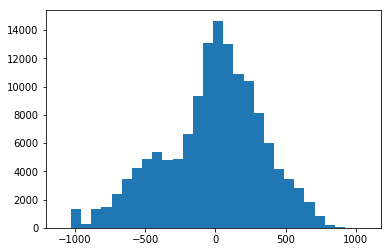

In [184]:
plt.hist(prediction_difference, bins=30)

(array([2.5000e+01, 1.3520e+03, 3.4200e+02, 1.5110e+03, 1.7730e+03,
        2.7190e+03, 3.5730e+03, 4.3330e+03, 4.9530e+03, 5.3650e+03,
        4.5850e+03, 4.7850e+03, 6.6860e+03, 8.8790e+03, 1.2195e+04,
        1.3888e+04, 1.2026e+04, 1.0443e+04, 1.0256e+04, 8.6020e+03,
        6.6190e+03, 4.5620e+03, 3.7640e+03, 3.1180e+03, 2.1460e+03,
        1.1290e+03, 3.1000e+02, 4.8000e+01, 1.1000e+01, 2.0000e+00]),
 array([-1211.1       , -1135.16168508, -1059.22337016,  -983.28505525,
         -907.34674033,  -831.40842541,  -755.47011049,  -679.53179557,
         -603.59348066,  -527.65516574,  -451.71685082,  -375.7785359 ,
         -299.84022099,  -223.90190607,  -147.96359115,   -72.02527623,
            3.91303869,    79.8513536 ,   155.78966852,   231.72798344,
          307.66629836,   383.60461328,   459.54292819,   535.48124311,
          611.41955803,   687.35787295,   763.29618786,   839.23450278,
          915.1728177 ,   991.11113262,  1067.04944754]),
 <a list of 30 Patch objects

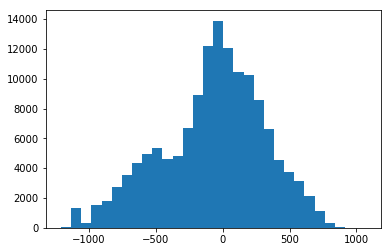

In [185]:
plt.hist(prediction_difference_small_effect, bins=30)

(array([4.7000e+01, 7.7100e+02, 1.2900e+03, 1.5740e+03, 3.4870e+03,
        3.4550e+03, 3.3750e+03, 3.7960e+03, 5.4350e+03, 5.2790e+03,
        4.5210e+03, 5.7090e+03, 6.9540e+03, 6.7050e+03, 8.0760e+03,
        1.1056e+04, 1.0469e+04, 8.4150e+03, 8.3160e+03, 9.1750e+03,
        8.7440e+03, 6.7620e+03, 5.2590e+03, 4.2160e+03, 3.4640e+03,
        2.4270e+03, 1.0370e+03, 1.6200e+02, 2.2000e+01, 2.0000e+00]),
 array([-1685.9227673 , -1594.31702681, -1502.71128631, -1411.10554582,
        -1319.49980532, -1227.89406483, -1136.28832434, -1044.68258384,
         -953.07684335,  -861.47110285,  -769.86536236,  -678.25962186,
         -586.65388137,  -495.04814087,  -403.44240038,  -311.83665988,
         -220.23091939,  -128.62517889,   -37.0194384 ,    54.5863021 ,
          146.19204259,   237.79778308,   329.40352358,   421.00926407,
          512.61500457,   604.22074506,   695.82648556,   787.43222605,
          879.03796655,   970.64370704,  1062.24944754]),
 <a list of 30 Patch objects

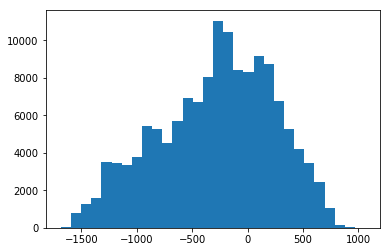

In [186]:
plt.hist(prediction_difference_large_effect, bins=30)

In [187]:
def simulate_rejection_region(patient_no, simulation_size):
    treatment_effects = []
    for i in range(simulation_size):
        treatment_effect = 0
        for i in range(patient_no):
            random_index = random.randint(0, len(prediction_difference) - 1)
            treatment_effect += prediction_difference[random_index]
        treatment_effects.append(treatment_effect/patient_no)
    treatment_effects.sort()
    return treatment_effects[math.floor(simulation_size * 0.05)]

In [205]:
def simulate_power(dataset, patient_no, simulation_size, rejection_region):
    treatment_effects = []
    for i in range(simulation_size):
        treatment_effect = 0
        for i in range(patient_no):
            random_index = random.randint(0, len(dataset) - 1)
            treatment_effect += dataset[random_index]
        treatment_effects.append(treatment_effect/patient_no)
    counter = 0
    for treatment_effect in treatment_effects:
        if treatment_effect < rejection_region:
            counter += 1
    #print(treatment_effects)
    return counter/len(treatment_effects)

In [209]:
for patient_no in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    rejection_region = simulate_rejection_region(patient_no, 10000)
    power_small = simulate_power(prediction_difference_small_effect, patient_no, 10000, rejection_region)
    power_medium = simulate_power(prediction_difference_medium_effect, patient_no, 10000, rejection_region)
    power_large = simulate_power(prediction_difference_large_effect, patient_no, 10000, rejection_region)
    print("for study with {} participants, we have power {}, {}, {} to detect 10%, 20% and 50% MAL difference. Rejection region is {}".format(patient_no, power_small, power_medium, power_large, rejection_region))

for study with 10 participants, we have power 0.1387, 0.2663, 0.6696 to detect 10%, 20% and 50% MAL difference. Rejection region is -207.32959668665862
for study with 20 participants, we have power 0.1817, 0.3814, 0.8638 to detect 10%, 20% and 50% MAL difference. Rejection region is -151.25786699424748
for study with 30 participants, we have power 0.2153, 0.4782, 0.9545 to detect 10%, 20% and 50% MAL difference. Rejection region is -127.8098501536078
for study with 40 participants, we have power 0.2544, 0.572, 0.9824 to detect 10%, 20% and 50% MAL difference. Rejection region is -112.44192262998351
for study with 50 participants, we have power 0.2959, 0.6533, 0.9931 to detect 10%, 20% and 50% MAL difference. Rejection region is -101.99368866748941
for study with 60 participants, we have power 0.3219, 0.7136, 0.9984 to detect 10%, 20% and 50% MAL difference. Rejection region is -94.42363792821146
for study with 70 participants, we have power 0.3461, 0.7591, 0.9995 to detect 10%, 20% and